In [5]:
#  Install Dependencies
!pip install librosa numpy pandas


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
#  Import Libraries
import os
import librosa
import numpy as np
import pandas as pd

In [12]:
#  Define Feature Extraction Function
def extract_features(file_path, sr=22050, n_mfcc=13):
    """
    Extract MFCC, pitch, zero crossing rate, and RMS energy from audio file.
    Returns a feature vector (list).
    """
    # Load audio
    y, sr = librosa.load(file_path, sr=sr)

    # MFCCs (mean + std)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)

    # Pitch estimation
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch_values = pitches[magnitudes > np.median(magnitudes)]
    pitch_mean = np.mean(pitch_values) if len(pitch_values) > 0 else 0
    pitch_std = np.std(pitch_values) if len(pitch_values) > 0 else 0

    # Zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_mean = np.mean(zcr)
    zcr_std = np.std(zcr)

    # RMS energy
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_std = np.std(rms)

    # Return combined features
    features = list(mfccs_mean) + list(mfccs_std) + [
        pitch_mean, pitch_std, zcr_mean, zcr_std, rms_mean, rms_std
    ]
    return features


In [13]:
# Create Dataset Folder Structure
import os

# Define main dataset directory
DATASET_DIR = "dataset"

# Define subfolders and labels
LABELS = ["truth", "lie", "uncertain"]

# Create folders if they don't exist
for label in LABELS:
    path = os.path.join(DATASET_DIR, label)
    os.makedirs(path, exist_ok=True)
    print(f"✅ Folder ready: {path}")

print("\nNow put your .wav files in:")
print("dataset/truth/ → for truthful speech")
print("dataset/lie/ → for lies")
print("dataset/uncertain/ → for uncertain cases")


✅ Folder ready: dataset\truth
✅ Folder ready: dataset\lie
✅ Folder ready: dataset\uncertain

Now put your .wav files in:
dataset/truth/ → for truthful speech
dataset/lie/ → for lies
dataset/uncertain/ → for uncertain cases


In [14]:
# Build CSV from Dataset (Notebook Ready)
import os
import pandas as pd

# Dataset base folder (make sure you already have dataset/truth, dataset/lie, dataset/uncertain)
DATASET_DIR = "dataset"

# Label mapping: truth=0, lie=1, uncertain=2
LABELS_MAP = {"truth": 0, "lie": 1, "uncertain": 2}

# Container for extracted rows
rows = []

# Loop through folders and extract features
for label_name, label_value in LABELS_MAP.items():
    folder = os.path.join(DATASET_DIR, label_name)
    if not os.path.isdir(folder):
        print(f"⚠️ Skipping missing folder: {folder}")
        continue

    # List all WAV files in current folder
    files = [f for f in os.listdir(folder) if f.lower().endswith(".wav")]
    print(f"📂 Found {len(files)} files in {label_name}/")

    for file in files:
        path = os.path.join(folder, file)
        try:
            # Extract features from audio file
            features = extract_features(path)

            # Add label at the end
            rows.append(features + [label_value])

            print(f"✅ Processed {file}")
        except Exception as e:
            print(f"❌ Error processing {file}: {e}")

# Define column names (13 MFCC mean + 13 MFCC std + pitch + ZCR + RMS + label)
columns = [f"mfcc_mean_{i}" for i in range(13)] + \
          [f"mfcc_std_{i}" for i in range(13)] + \
          ["pitch_mean", "pitch_std", "zcr_mean", "zcr_std", "rms_mean", "rms_std", "label"]

# Create DataFrame
df = pd.DataFrame(rows, columns=columns)

# Save as CSV
csv_path = "voice_features.csv"
df.to_csv(csv_path, index=False)

print(f"\n🎯 Features extracted: {df.shape[0]} samples, {df.shape[1]} features")
print(f"📄 Saved CSV to: {csv_path}")


📂 Found 0 files in truth/
📂 Found 0 files in lie/
📂 Found 0 files in uncertain/

🎯 Features extracted: 0 samples, 33 features
📄 Saved CSV to: voice_features.csv


In [15]:
# Preview Extracted CSV

# Check first 5 rows of the dataframe
df.head()


,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,mfcc_std_10,mfcc_std_11,mfcc_std_12,pitch_mean,pitch_std,zcr_mean,zcr_std,rms_mean,rms_std,label


In [16]:
# Basic Info about Dataset
# Shape of the dataset (rows = audio samples, columns = features)
print("Dataset shape:", df.shape)

# Check if there are missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Count of each label
print("\nLabel distribution:")
print(df["label"].value_counts())


Dataset shape: (0, 33)

Missing values per column:
 mfcc_mean_0     0
mfcc_mean_1     0
mfcc_mean_2     0
mfcc_mean_3     0
mfcc_mean_4     0
mfcc_mean_5     0
mfcc_mean_6     0
mfcc_mean_7     0
mfcc_mean_8     0
mfcc_mean_9     0
mfcc_mean_10    0
mfcc_mean_11    0
mfcc_mean_12    0
mfcc_std_0      0
mfcc_std_1      0
mfcc_std_2      0
mfcc_std_3      0
mfcc_std_4      0
mfcc_std_5      0
mfcc_std_6      0
mfcc_std_7      0
mfcc_std_8      0
mfcc_std_9      0
mfcc_std_10     0
mfcc_std_11     0
mfcc_std_12     0
pitch_mean      0
pitch_std       0
zcr_mean        0
zcr_std         0
rms_mean        0
rms_std         0
label           0
dtype: int64

Label distribution:
Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

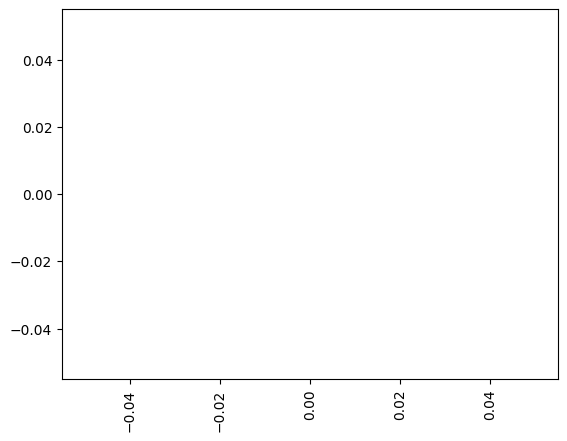

In [17]:
# Quick Visualization (Optional)
import matplotlib.pyplot as plt

# Plot distribution of labels
df["label"].value_counts().plot(kind="bar", color=["green","red","orange"])
plt.title("Label Distribution (0=Truth, 1=Lie, 2=Uncertain)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [18]:
print(df.shape)
print(df.head())


(0, 33)
Empty DataFrame
Columns: [mfcc_mean_0, mfcc_mean_1, mfcc_mean_2, mfcc_mean_3, mfcc_mean_4, mfcc_mean_5, mfcc_mean_6, mfcc_mean_7, mfcc_mean_8, mfcc_mean_9, mfcc_mean_10, mfcc_mean_11, mfcc_mean_12, mfcc_std_0, mfcc_std_1, mfcc_std_2, mfcc_std_3, mfcc_std_4, mfcc_std_5, mfcc_std_6, mfcc_std_7, mfcc_std_8, mfcc_std_9, mfcc_std_10, mfcc_std_11, mfcc_std_12, pitch_mean, pitch_std, zcr_mean, zcr_std, rms_mean, rms_std, label]
Index: []

[0 rows x 33 columns]


In [19]:
print("Rows in df:", len(df))
print(df.head())


Rows in df: 0
Empty DataFrame
Columns: [mfcc_mean_0, mfcc_mean_1, mfcc_mean_2, mfcc_mean_3, mfcc_mean_4, mfcc_mean_5, mfcc_mean_6, mfcc_mean_7, mfcc_mean_8, mfcc_mean_9, mfcc_mean_10, mfcc_mean_11, mfcc_mean_12, mfcc_std_0, mfcc_std_1, mfcc_std_2, mfcc_std_3, mfcc_std_4, mfcc_std_5, mfcc_std_6, mfcc_std_7, mfcc_std_8, mfcc_std_9, mfcc_std_10, mfcc_std_11, mfcc_std_12, pitch_mean, pitch_std, zcr_mean, zcr_std, rms_mean, rms_std, label]
Index: []

[0 rows x 33 columns]
